## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
df_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
nbr_of_mice = mouse_metadata["Mouse ID"].count()
nbr_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_duplicate_rows = df_mouse_study[df_mouse_study.duplicated()]
df_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_g989 = df_mouse_study.loc[df_mouse_study['Mouse ID']=='g989']
df_mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_mouse = df_mouse_study.drop_duplicates()
df_clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.


df_clean_mouse["Mouse ID"].value_counts()


g989    12
m550    10
g497    10
c757    10
e584    10
        ..
t573     1
x226     1
f932     1
v199     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

df_mouse_group = df_clean_mouse.groupby(["Drug Regimen"])

#df_mouse_group.head(5)
# # This method is the most straighforward, creating multiple series and putting them all together at the end.


tumor_volume_mean = df_mouse_group["Tumor Volume (mm3)"].mean()
tumor_volume_median = df_mouse_group["Tumor Volume (mm3)"].median()
tumor_volume_std = df_mouse_group["Tumor Volume (mm3)"].std()
tumor_volume_var = df_mouse_group["Tumor Volume (mm3)"].var()
tumor_volume_sem = df_mouse_group["Tumor Volume (mm3)"].sem()

df_mouse_summary = pd.DataFrame({
                                "Tumor Volume Mean":tumor_volume_mean,
                                 "Tumor Volume Median":tumor_volume_median,
                                 "Tumor Volume Standard Deviation":tumor_volume_std,
                                 "Tumor Volume_Variance":tumor_volume_var,
                                 "Tumor Volume SEM":tumor_volume_sem})
                                 
df_mouse_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume_Variance,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.368318,50.909965,6.502160,42.278090,0.514041
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
df_mouse_statistics = df_clean_mouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
df_mouse_statistics

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.368318  50.909965  6.502160  42.278090  0.514041
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

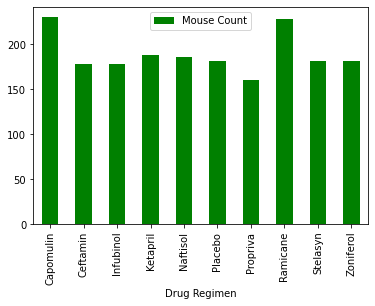

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#filter the dataframe down to only to those columns to chart

# Tke the complete dataframe and create a new one that will be grouped by Regimen and have a mouse count per
# this one just takes in Regimen and Mouse Id

df_regimen_and_mouse = df_clean_mouse[["Drug Regimen","Mouse ID"]]

# Assign new variable grouped dataframe on Drug Regiment and count Mouse ID
df_bar_chart_by_regimen = df_regimen_and_mouse.groupby(["Drug Regimen"]).count()
df_bar_chart_by_regimen.columns=["Mouse Count"]
# Plot bar color green
df_bar_chart_by_regimen.plot.bar(color="Green")


In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
df_regimen_and_mouse.plot(kind=bar,x="Drug Regimen",y="Mouse ID")

NameError: name 'bar' is not defined

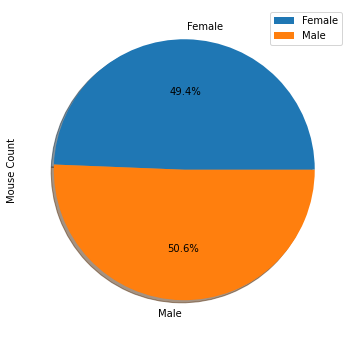

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_by_sex = df_clean_mouse[["Sex","Mouse ID"]]

df_pie_chart_by_sex = df_by_sex.groupby(["Sex"]).count()
df_pie_chart_by_sex.columns=["Mouse Count"]

plot = df_pie_chart_by_sex.plot.pie(subplots=True, autopct='%1.1f%%', shadow=True, figsize=(11, 6))


[Text(0.5, 1.0, 'Percentage of Mice by Sex')]

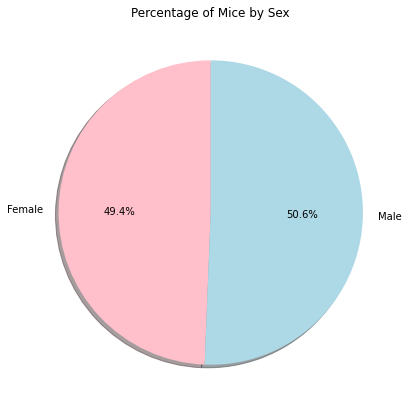

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_count = df_pie_chart_by_sex["Mouse Count"]
labels = mouse_count.index
colors = ['pink', 'lightblue']

fig, ax = plt.subplots(figsize=(10,7))
ax.pie(mouse_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
ax.set(title='Percentage of Mice by Sex')

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


df_treatments = df_clean_mouse.loc[(df_clean_mouse["Drug Regimen"]=='Capomulin') | (df_clean_mouse["Drug Regimen"]=='Ramacine') | (df_clean_mouse["Drug Regimen"]=='Infubinol') | (df_clean_mouse["Drug Regimen"]=='Ceftamin'),:]
#df_treatments                

#df_Capomulin = df_clean_mouse[df_treatments]["Tumor Volume (mm3)"]                                  
#df_Capomulin.head(5)
df_treatment_by_mouse_grouped = df_treatments.groupby(["Mouse ID"])

#df_treatment_by_mouse_grouped_max = df_treatment_by_mouse_grouped.groupedby.max("Timepoint")
# Start by getting the last (greatest) timepoint for each mouse
treatment_mouse_max_list = df_treatment_by_mouse_grouped["Timepoint"].max()
df_timepoint_max = treatment_mouse_max_list

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_tumor_volume = pd.merge(df_treatments, df_timepoint_max, how='inner', on = ["Mouse ID", "Timepoint"])



In [62]:
# Put treatments into a list for for loop (and later for plot labels)


regimen_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimen_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes   
    tumor_volume.append(df_tumor_volume.loc[df_tumor_volume["Drug Regimen"]==regimen]["Tumor Volume (mm3)"])
    
tumor_volume    
    
#quartiles = tumor_volume.quantile(.25,.5,.75)                
#lowerq = quartile[0.25]
#upperq = quartile[0.75]
#iqr = upperq-lowerq

    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[0     23.343598
 1     28.484033
 2     28.430964
 3     30.485985
 4     31.023923
 5     31.896238
 6     32.377357
 7     33.329098
 8     34.455298
 9     37.311846
 10    36.041047
 11    37.074024
 12    38.846876
 13    38.939633
 14    38.982878
 15    38.753265
 16    38.125164
 17    39.952347
 18    40.658124
 19    40.159220
 20    40.728578
 21    41.483008
 22    41.581521
 23    47.685963
 57    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 26    62.999356
 29    45.000000
 30    56.057749
 31    55.742829
 37    48.722078
 38    47.784682
 40    61.849023
 41    68.923185
 44    67.748662
 45    57.918381
 46    46.784535
 47    59.851956
 48    64.299830
 51    59.741901
 54    61.433892
 56    64.192341
 59    45.000000
 60    52.925348
 61    45.000000
 65    67.527482
 68    45.000000
 69    64.634949
 70    61.386660
 72    68.594745
 73    64.729837
 Name: Tumor Volume (mm3), dtype: float64,
 24    67.973419
 25    65.525743
 27    57.031862
 28    66.083

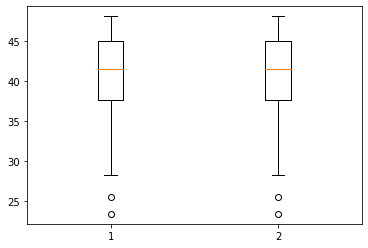

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

df_treatments = df_clean_mouse["Drug Regimen"]=='Capomulin'
df_Capomulin = df_clean_mouse[df_treatments]["Tumor Volume (mm3)"]                                  

plt.boxplot([df_Capomulin,df_Capomulin])
plt.show()

## Line and Scatter Plots

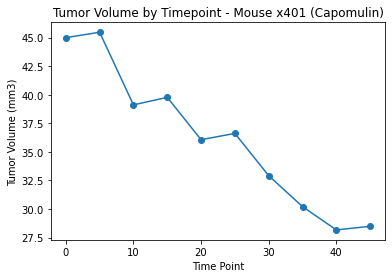

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#get mouse from row #10 taking Capomulin
regimen_mice = df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Capomulin"].reset_index()
regimen_mouse = regimen_mice["Mouse ID"][10]

#set x-axis to time and y-axis to tumor volume
x_time = df_clean_mouse.loc[df_clean_mouse["Mouse ID"]==regimen_mouse]["Timepoint"]
y_tumor_volume = df_clean_mouse.loc[df_clean_mouse["Mouse ID"]==regimen_mouse]["Tumor Volume (mm3)"]

#create plot
plt.plot(x_time,y_tumor_volume,marker="o")

#set title, labels and show graph

plt.title("Tumor Volume by Timepoint - Mouse x401 (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

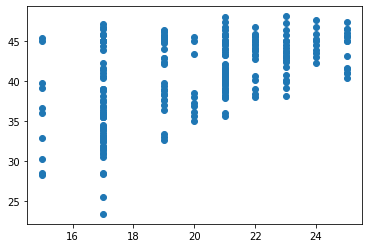

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(regimen_mice.iloc[:,5],regimen_mice.iloc[:,7])
plt.xlabel=('Weight of Mouse')
plt.ylabel=('Tumor Volume (mm3)')
